In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf

2023-07-29 11:13:54.541723: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
tf.__version__

'2.5.0'

In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

In [4]:
images.nbytes

12909019136

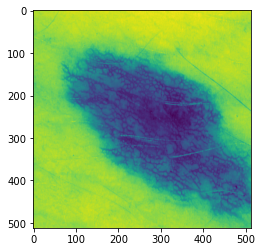

In [5]:
imshow(images[3])

In [6]:
masks.shape

(12311, 512, 512, 1)

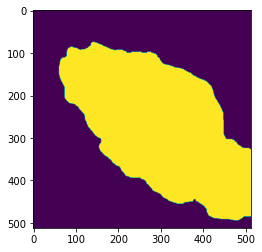

In [7]:
imshow(masks[3])

In [8]:
masks[1001].max()

True

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np

class VisualizeMaskCallback(Callback):
    def __init__(self, validation_data, index=0):
        self.validation_data = validation_data
        self.index = index

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        # Select the image and mask at index 'self.index' from the validation set
        x_val, y_val = self.validation_data[0][self.index], self.validation_data[1][self.index]

        # Predict the mask for the image at index 'self.index' in the validation set
        y_pred = self.model.predict(x_val[np.newaxis, ...])[0]  # the prediction is made for only one image, so we index it with 0

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)

        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

In [11]:
vis_callback = VisualizeMaskCallback(validation_data=(images, masks), index=3)


In [12]:
from keras import losses

In [13]:
#loss_fx = losses.KLD  # Does not work at all
loss_fx = losses.poisson

In [14]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpurqj8elgkuc_unet2d


In [15]:
hist = C.train(images[0:1000], masks[0:1000], images[1000:1500], masks[1000:1500], batch_size=16, patience_counter=4)

Epoch 1/100
63/63 [==============================] - 38s 468ms/step - loss: 0.4979 - dice_coeff: 0.5948 - val_loss: 1.0000 - val_dice_coeff: 0.4355
Epoch 2/100
63/63 [==============================] - 25s 399ms/step - loss: 0.4588 - dice_coeff: 0.6462 - val_loss: 0.9941 - val_dice_coeff: 0.4373
Epoch 3/100
63/63 [==============================] - 25s 400ms/step - loss: 0.4442 - dice_coeff: 0.6688 - val_loss: 0.7881 - val_dice_coeff: 0.5123
Epoch 4/100
63/63 [==============================] - 25s 401ms/step - loss: 0.4437 - dice_coeff: 0.6705 - val_loss: 0.9967 - val_dice_coeff: 0.4363
Epoch 5/100
63/63 [==============================] - 25s 401ms/step - loss: 0.4446 - dice_coeff: 0.6702 - val_loss: 0.8855 - val_dice_coeff: 0.4744
Epoch 6/100
63/63 [==============================] - 25s 403ms/step - loss: 0.4410 - dice_coeff: 0.6788 - val_loss: 0.6942 - val_dice_coeff: 0.5642
Epoch 7/100
63/63 [==============================] - 25s 405ms/step - loss: 0.4343 - dice_coeff: 0.6904 - val_lo

63/63 [==============================] - 25s 405ms/step - loss: 0.3756 - dice_coeff: 0.7867 - val_loss: 0.5057 - val_dice_coeff: 0.7630
Epoch 57/100
63/63 [==============================] - 25s 406ms/step - loss: 0.3733 - dice_coeff: 0.7968 - val_loss: 0.5192 - val_dice_coeff: 0.6714
Epoch 58/100
63/63 [==============================] - 26s 407ms/step - loss: 0.3716 - dice_coeff: 0.8010 - val_loss: 0.5906 - val_dice_coeff: 0.7089
Epoch 59/100
63/63 [==============================] - 26s 408ms/step - loss: 0.3672 - dice_coeff: 0.8015 - val_loss: 0.4840 - val_dice_coeff: 0.7738
Epoch 60/100
63/63 [==============================] - 25s 405ms/step - loss: 0.3665 - dice_coeff: 0.8088 - val_loss: 0.4560 - val_dice_coeff: 0.7860
Epoch 61/100
63/63 [==============================] - 25s 404ms/step - loss: 0.3676 - dice_coeff: 0.8066 - val_loss: 0.5173 - val_dice_coeff: 0.7468
Epoch 62/100
63/63 [==============================] - 25s 405ms/step - loss: 0.3689 - dice_coeff: 0.8029 - val_loss: 0.

In [16]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

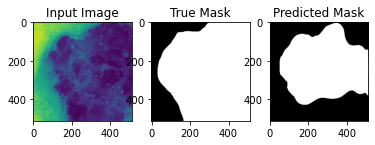

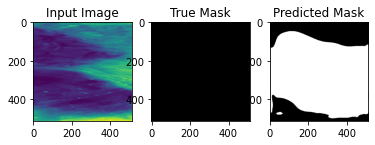

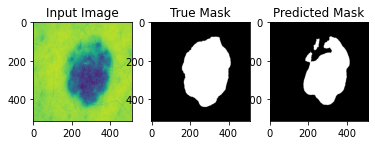

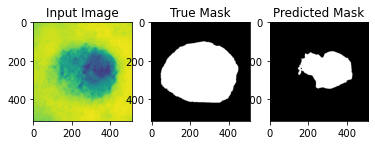

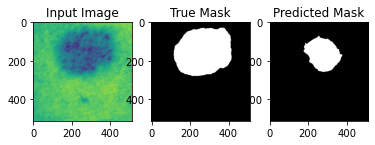

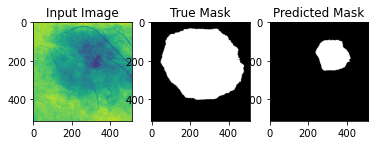

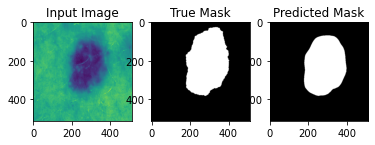

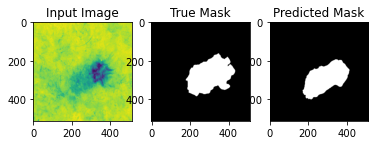

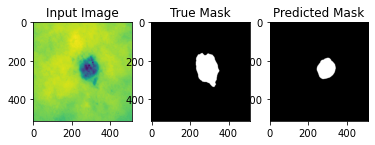

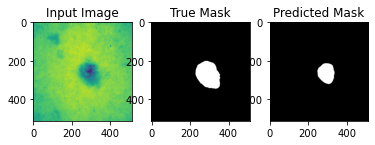

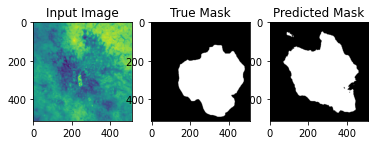

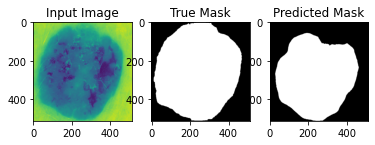

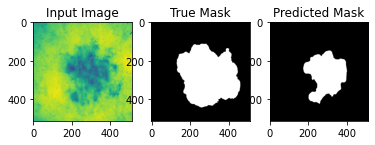

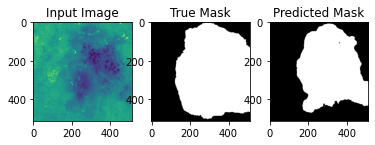

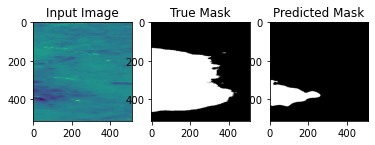

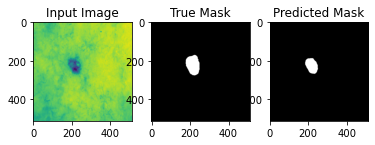

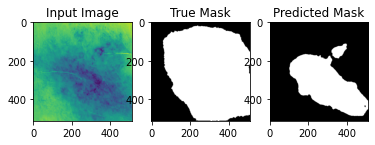

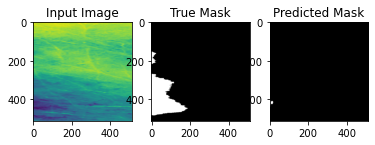

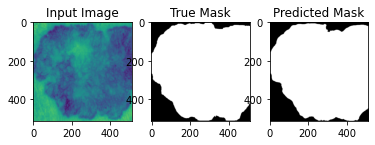

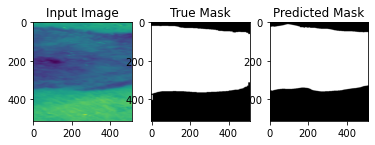

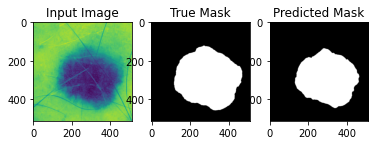

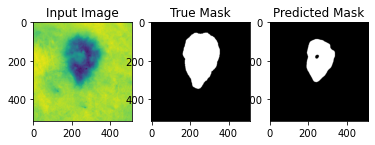

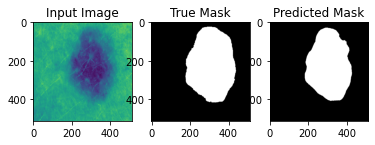

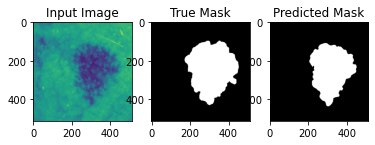

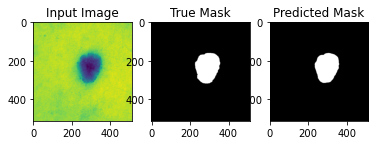

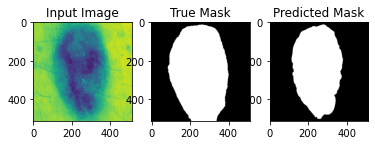

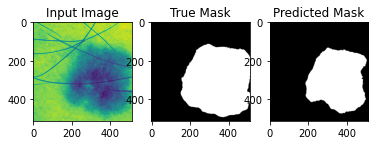

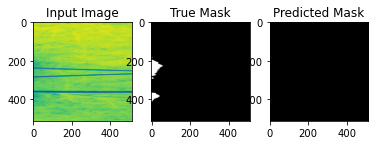

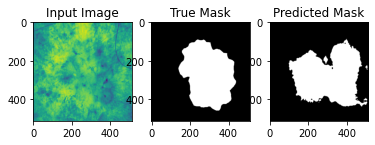

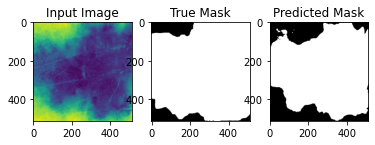

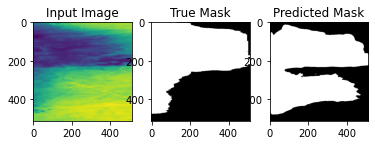

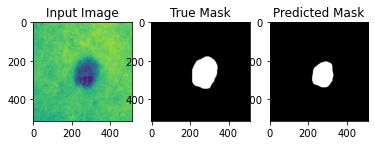

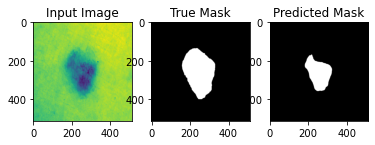

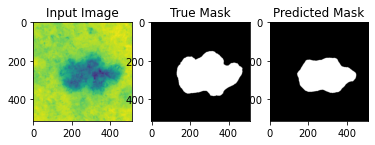

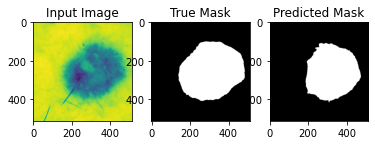

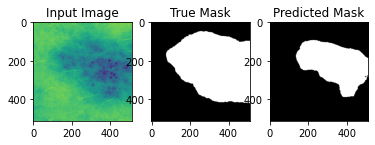

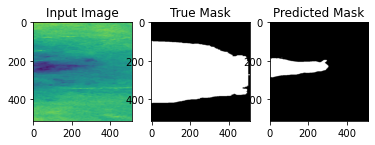

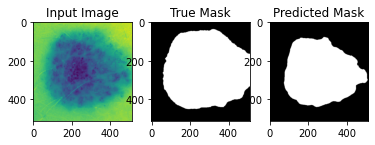

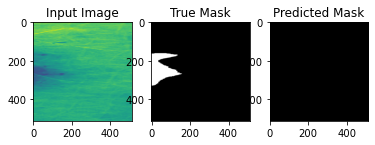

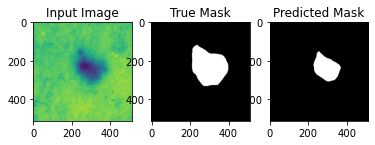

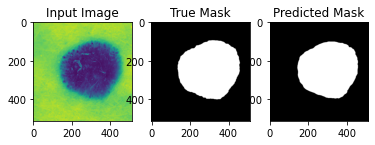

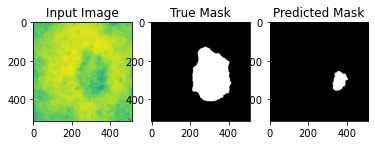

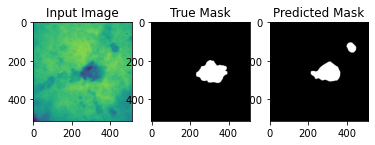

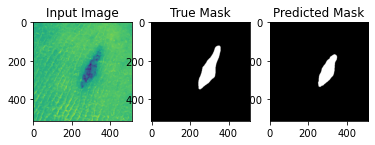

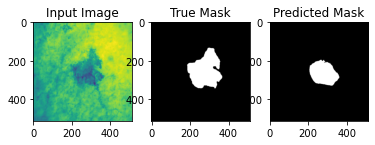

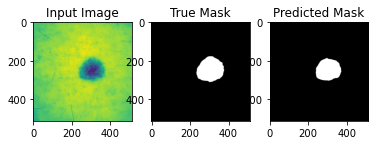

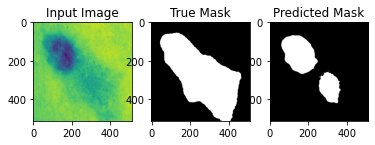

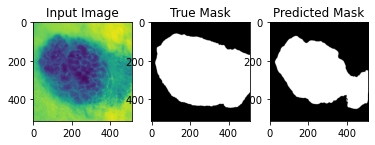

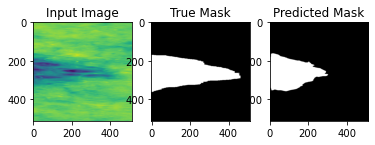

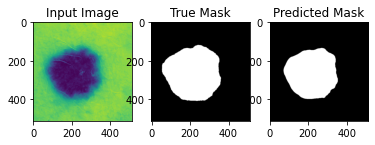

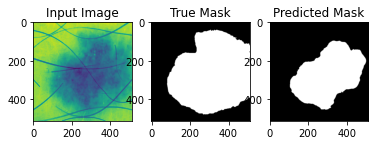

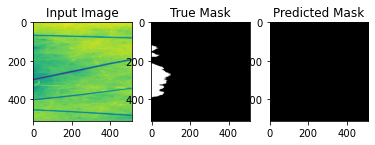

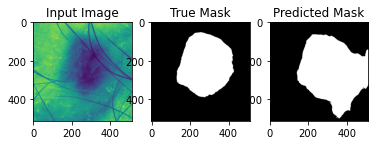

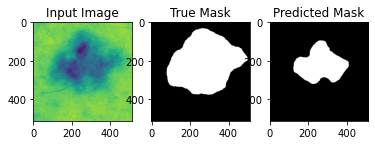

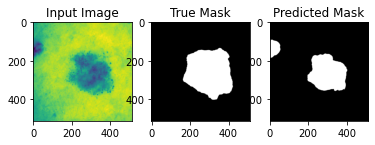

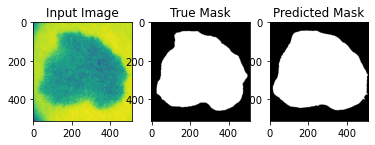

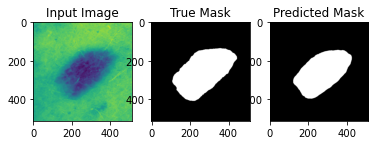

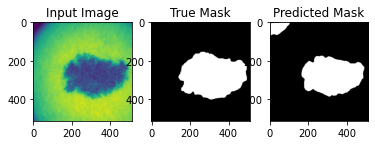

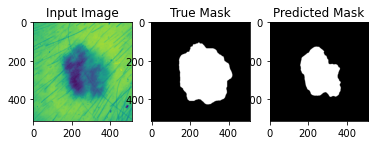

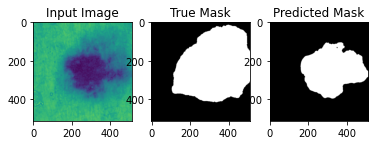

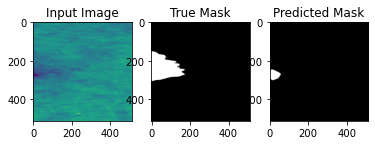

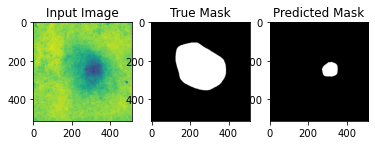

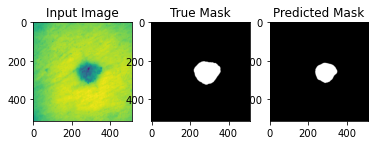

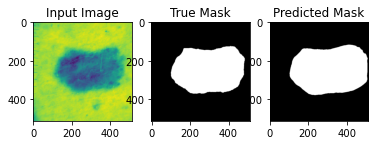

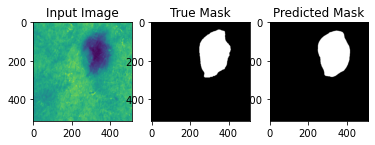

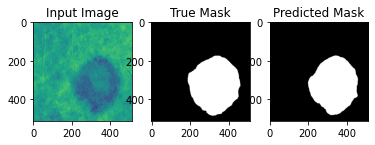

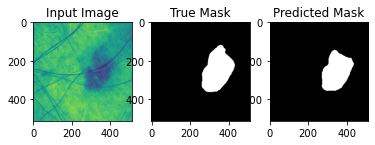

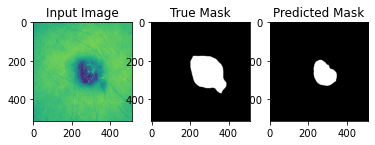

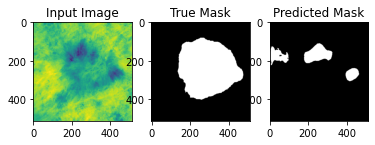

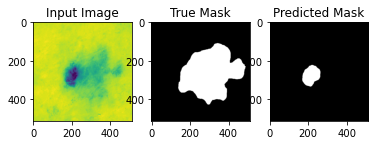

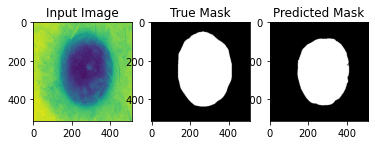

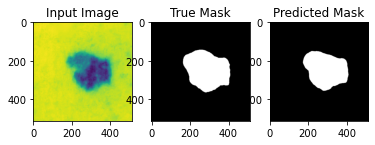

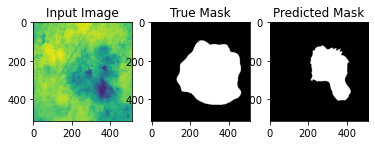

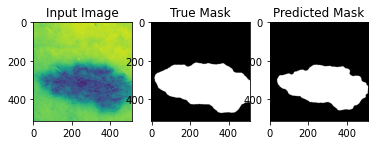

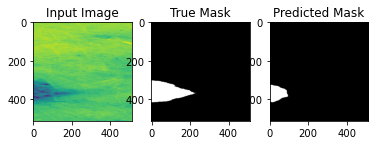

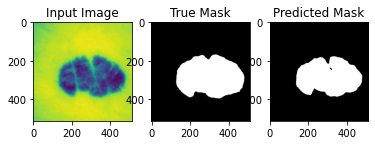

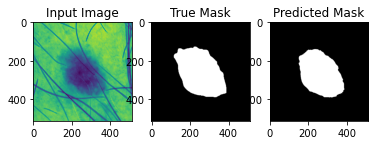

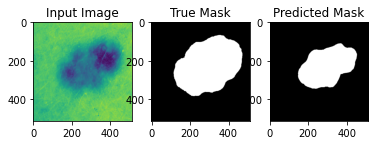

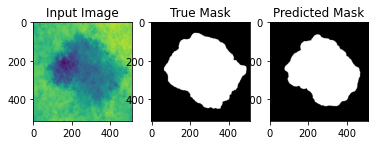

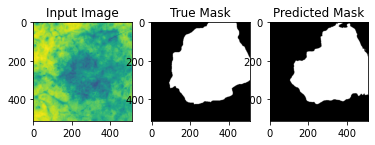

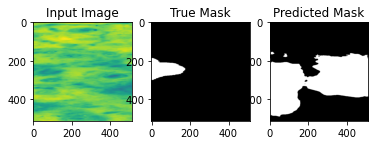

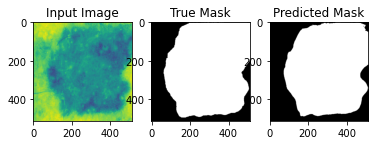

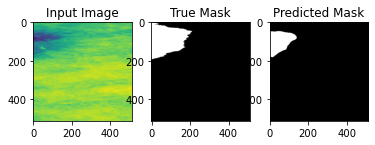

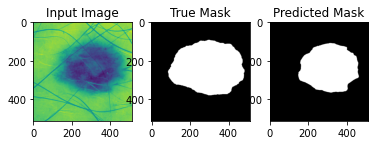

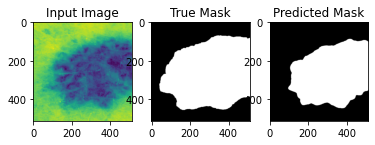

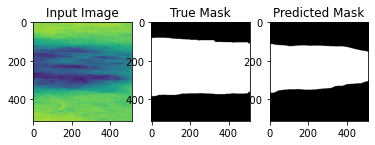

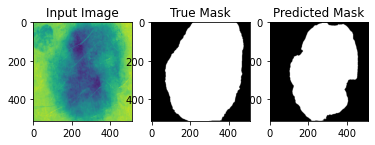

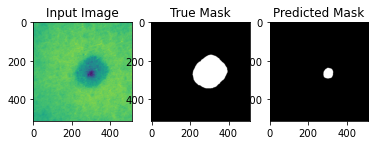

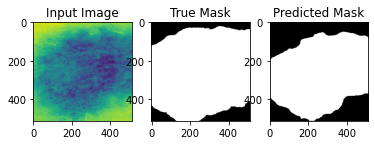

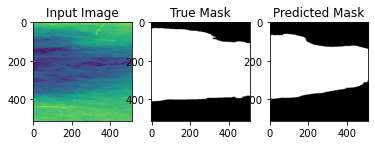

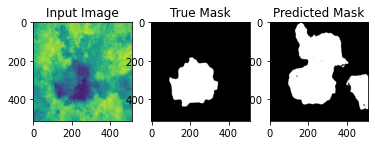

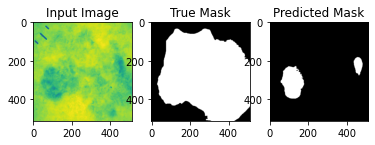

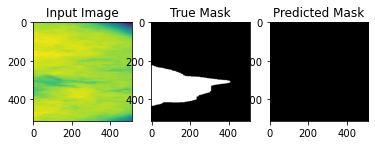

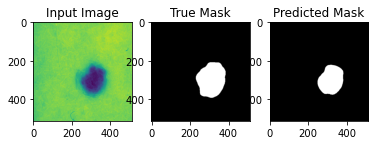

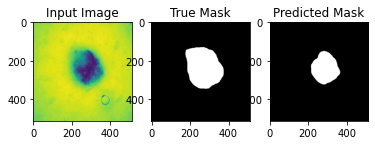

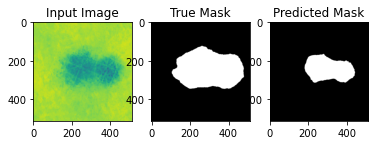

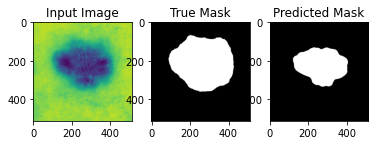

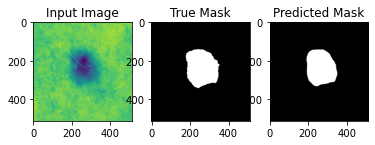

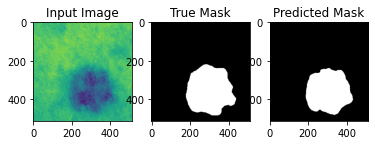

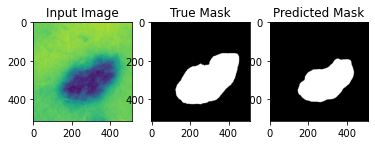

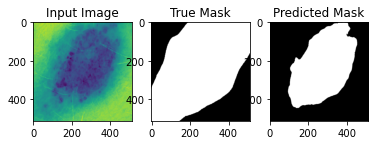

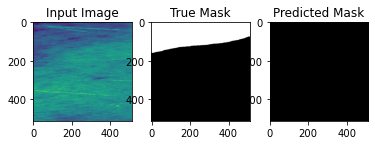

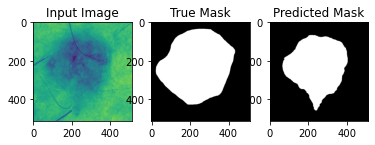

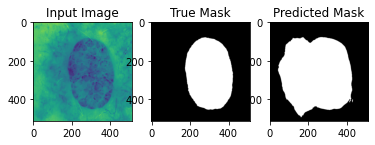

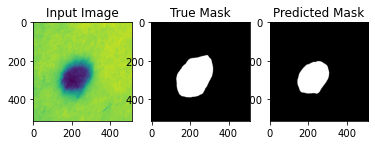

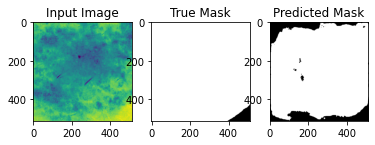

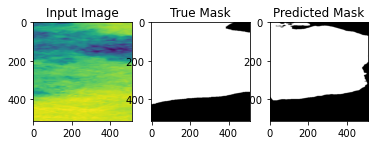

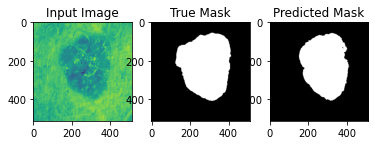

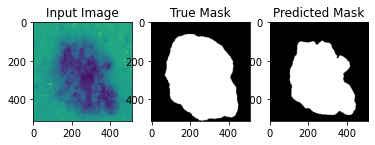

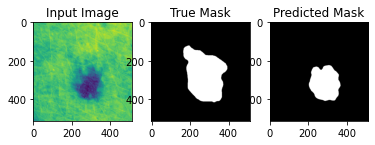

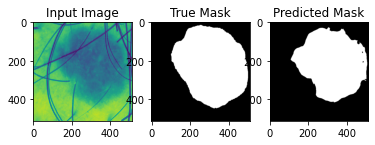

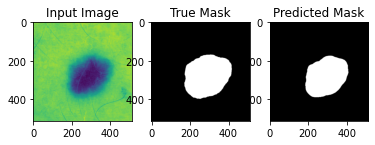

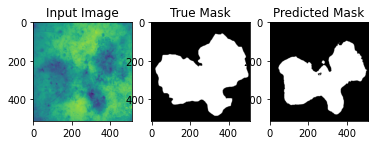

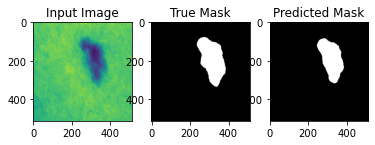

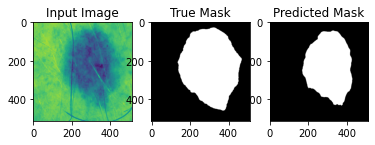

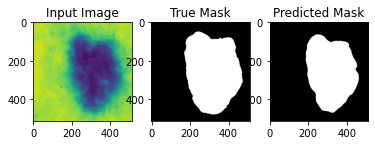

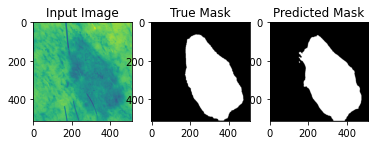

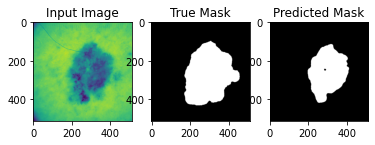

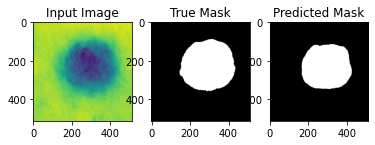

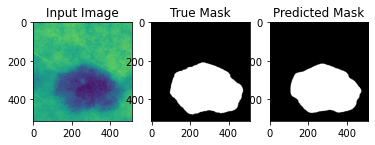

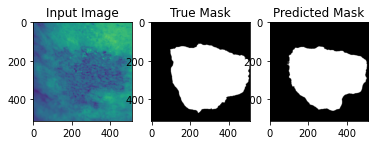

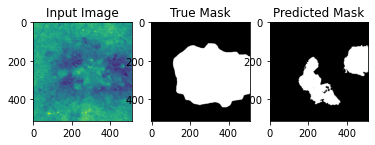

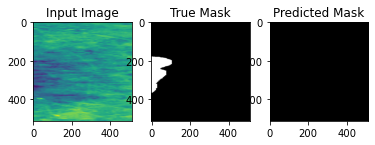

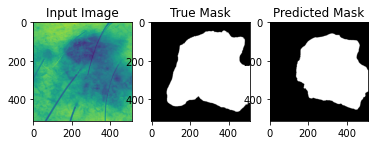

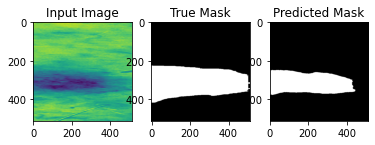

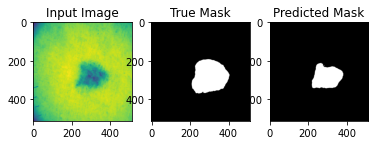

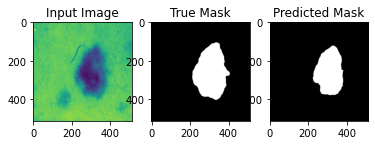

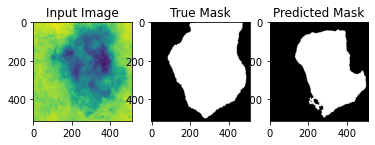

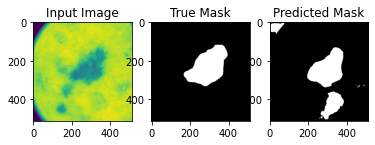

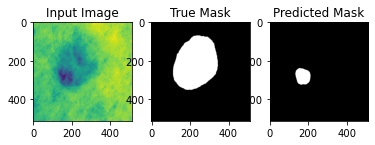

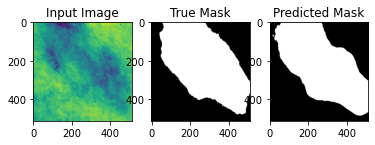

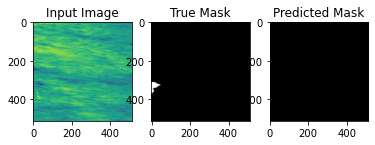

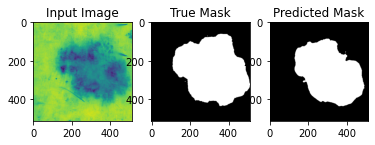

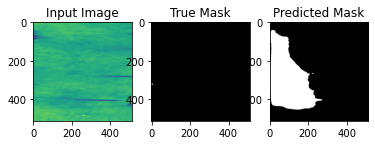

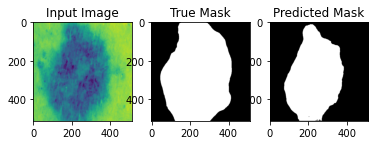

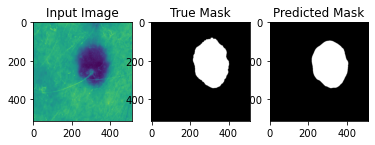

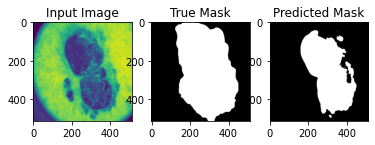

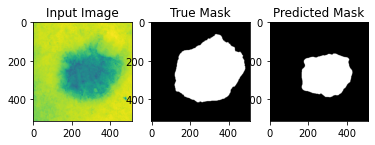

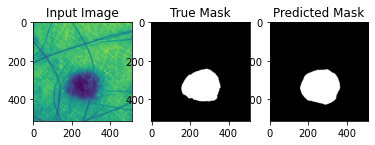

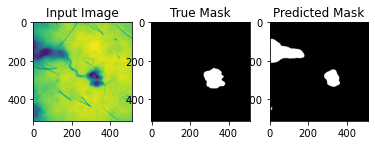

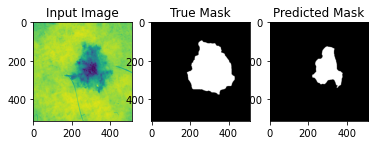

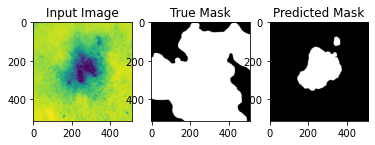

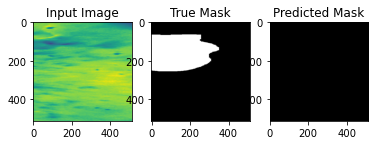

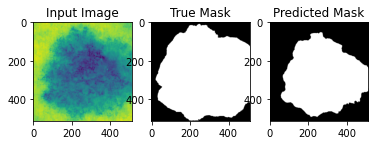

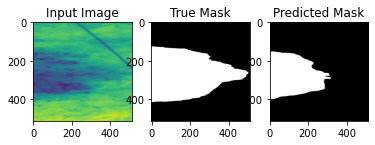

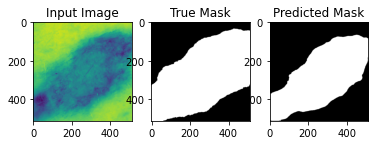

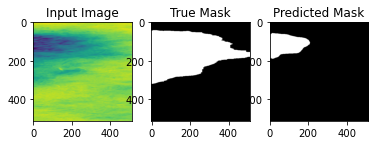

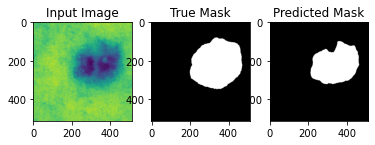

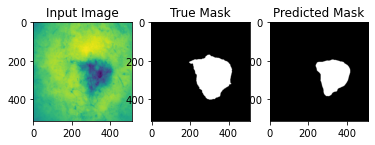

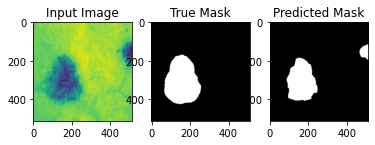

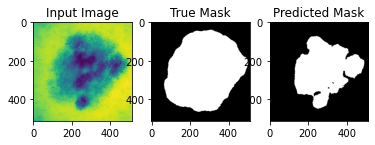

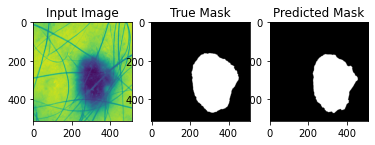

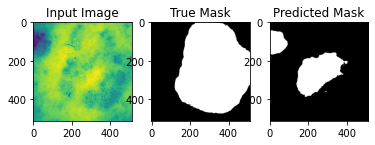

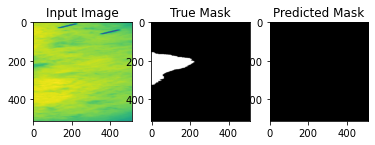

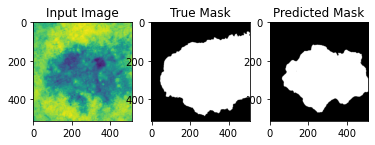

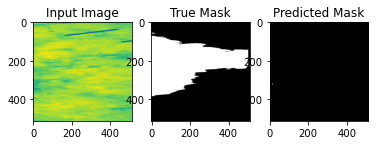

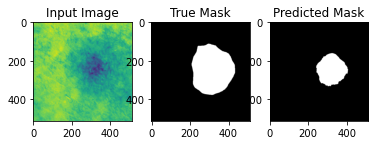

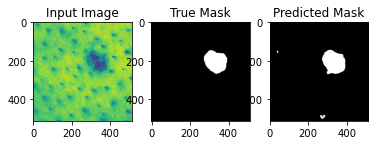

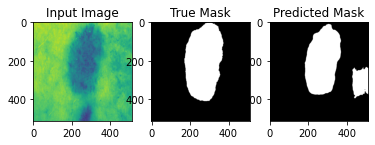

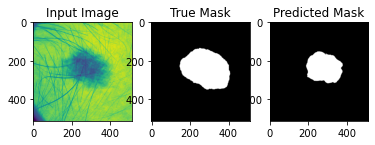

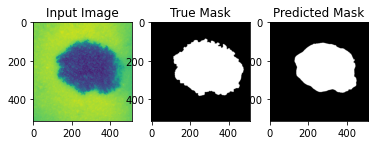

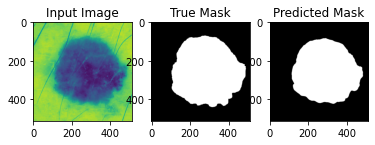

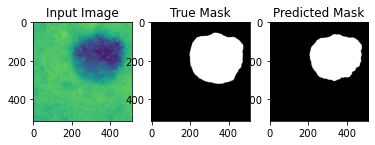

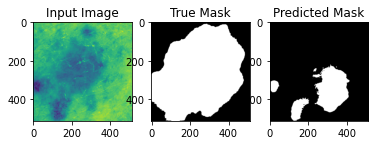

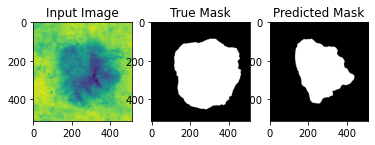

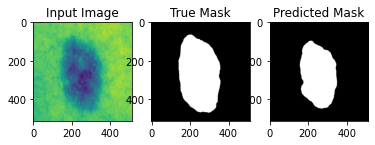

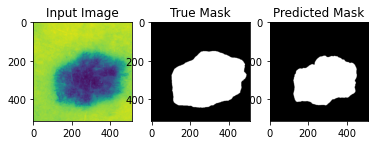

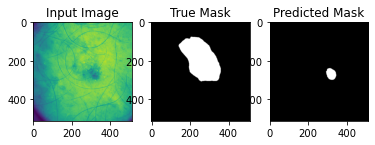

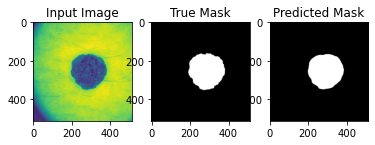

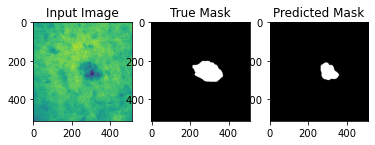

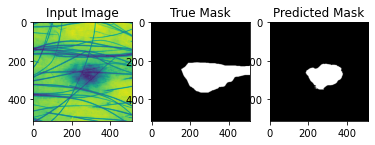

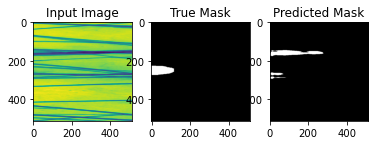

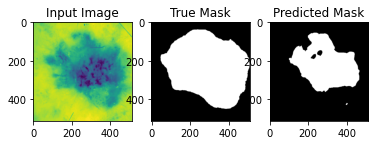

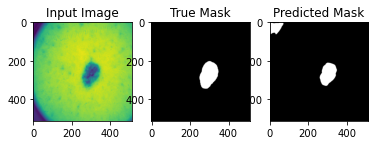

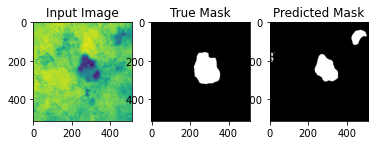

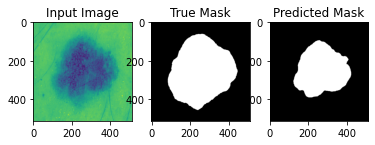

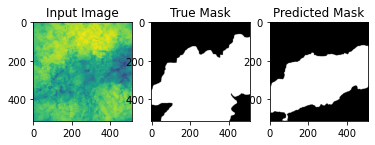

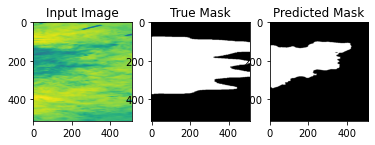

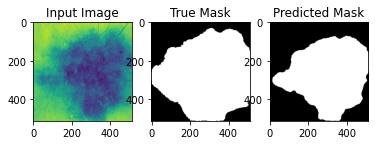

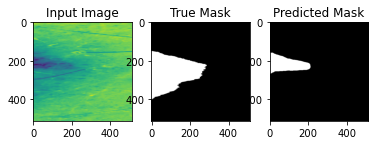

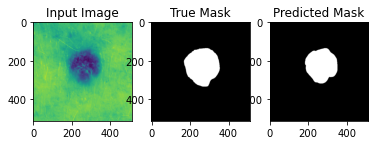

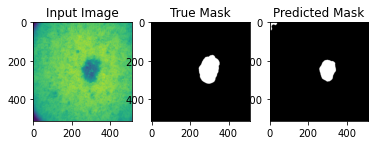

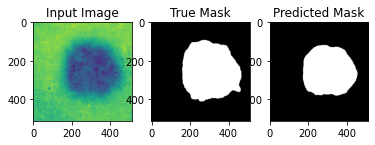

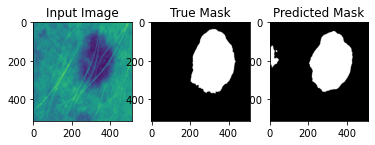

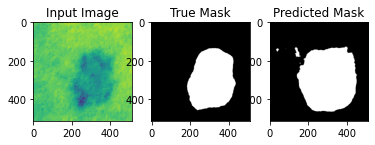

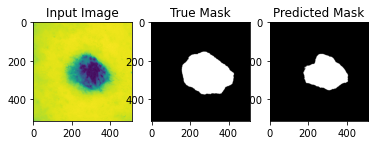

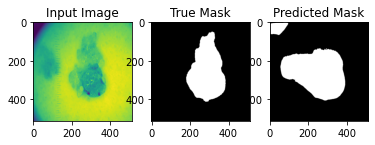

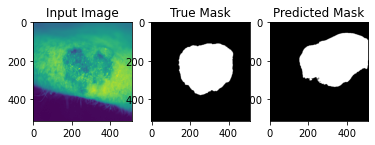

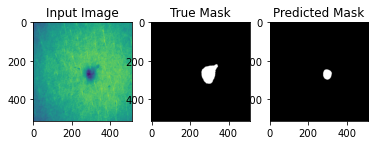

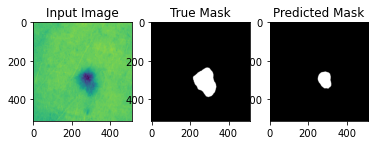

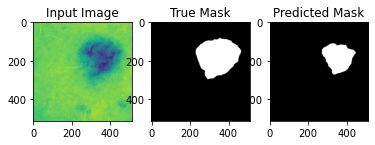

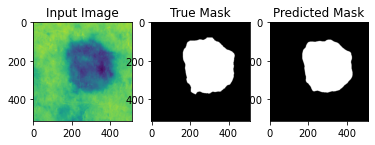

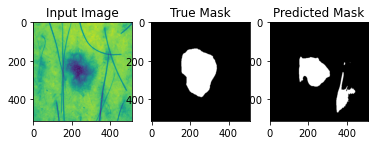

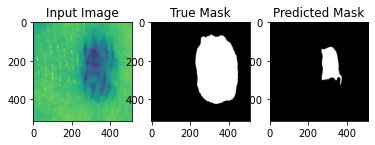

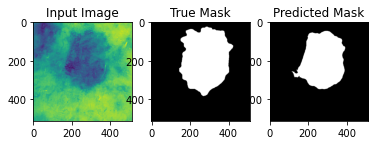

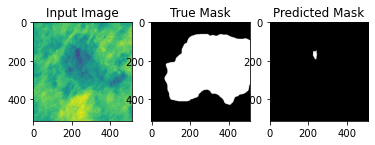

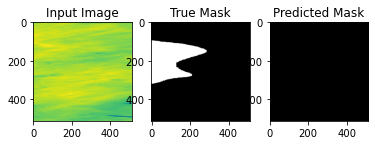

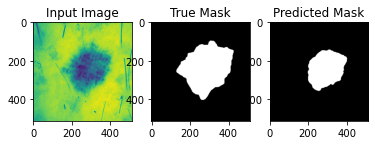

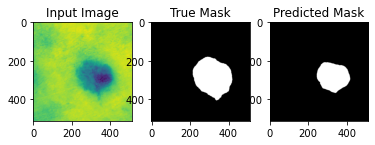

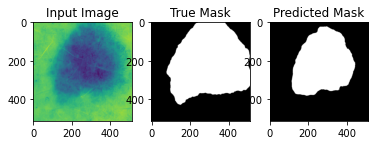

In [17]:
visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=200)